# Creating Final Dataframe

In [3]:
# Filters all audio files that are 5 seconds or longer
duration_filter = full_df[(full_df['duration'] >= 5)]

# Creates a new column that counts how many audio files a species has
duration_filter['freq'] = duration_filter.groupby('species')['species'].transform('count')

duration_filter

rating playback_used ebird_code    channels       date  duration  \
0         3.5            no     aldfly    1 (mono)  5/25/2013        25   
1         4.0            no     aldfly  2 (stereo)  5/27/2013        36   
2         4.0            no     aldfly  2 (stereo)  5/27/2013        39   
3         3.5            no     aldfly  2 (stereo)  5/27/2013        33   
4         4.0            no     aldfly  2 (stereo)  5/27/2013        36   
...       ...           ...        ...         ...        ...       ...   
45154     4.5            no     yetvir  2 (stereo)  5/16/2020        63   
45155     4.0            no     yetvir    1 (mono)  7/27/2020        41   
45156     4.0            no     yetvir  2 (stereo)  7/10/2020        25   
45157     3.5            no     yetvir    1 (mono)   7/3/2020        33   
45158     4.0            no     yetvir  2 (stereo)   6/4/2020        15   

           filename                species  \
0      XC134874.mp3       Alder Flycatcher   
1      XC135454.mp3       Alder Flycatcher   
2      XC135455.mp3       Alder Flycatcher   
3      XC135456.mp3       Alder Flycatcher   
4      XC135457.mp3       Alder Flycatcher   
...             ...                    ...   
45154  XC558915.mp3  Yellow-throated Vireo   
45155  XC579823.mp3  Yellow-throated Vireo   
45156  XC574737.mp3  Yellow-throated Vireo   
45157  XC573213.mp3  Yellow-throated Vireo   
45158  XC565140.mp3  Yellow-throated Vireo   

                                                   title  \
0          XC134874 Alder Flycatcher (Empidonax alnorum)   
1          XC135454 Alder Flycatcher (Empidonax alnorum)   
2          XC135455 Alder Flycatcher (Empidonax alnorum)   
3          XC135456 Alder Flycatcher (Empidonax alnorum)   
4          XC135457 Alder Flycatcher (Empidonax alnorum)   
...                                                  ...   
45154  XC558915 Yellow-throated Vireo (Vireo flavifrons)   
45155  XC579823 Yellow-throated Vireo (Vireo flavifrons)   
45156  XC574737 Yellow-throated Vireo (Vireo flavifrons)   
45157  XC573213 Yellow-throated Vireo (Vireo flavifrons)   
45158  XC565140 Yellow-throated Vireo (Vireo flavifrons)   

                                        secondary_labels  ...   xc_id  \
0      ['Empidonax minimus_Least Flycatcher', 'Leioth...  ...  134874   
1                                                     []  ...  135454   
2                                                     []  ...  135455   
3      ['Dumetella carolinensis_Gray Catbird', 'Bomby...  ...  135456   
4                                                     []  ...  135457   
...                                                  ...  ...     ...   
45154            ['Setophaga striata_Blackpoll Warbler']  ...  558915   
45155                                                 []  ...  579823   
45156                                                 []  ...  574737   
45157         ['Geothlypis trichas_Common Yellowthroat']  ...  573213   
45158                                                 []  ...  565140   

                                     url        country             author  \
0      https://www.xeno-canto.org/134874  United States   Jonathon Jongsma   
1      https://www.xeno-canto.org/135454  United States        Mike Nelson   
2      https://www.xeno-canto.org/135455  United States        Mike Nelson   
3      https://www.xeno-canto.org/135456  United States        Mike Nelson   
4      https://www.xeno-canto.org/135457  United States        Mike Nelson   
...                                  ...            ...                ...   
45154  https://www.xeno-canto.org/558915  United States  William Whitehead   
45155  https://www.xeno-canto.org/579823  United States       Bobby Wilcox   
45156  https://www.xeno-canto.org/574737         Canada          Jon Ruddy   
45157  https://www.xeno-canto.org/573213  United States  Annette McClellan   
45158  https://www.xeno-canto.org/565140  United States     Michael Hurben   

                  

In [4]:
# Filters all species that occurs 50 or more times
model_data = duration_filter[(duration_filter['freq'] >= 50)]

# Compare row numbers from original dataframe to filtered dataframe
print("The original dataframe had", full_df.shape[0], "rows")
print("Filtering for audio files lasting for 5 seconds or longer returned", duration_filter.shape[0], "rows")
print("Filtering for species that had 50 or more occurences returned", model_data.shape[0], "rows")
print("Number of rows removed from original dataframe:", full_df.shape[0] - model_data.shape[0])

The original dataframe had 45159 rows
Filtering for audio files lasting for 5 seconds or longer returned 42644 rows
Filtering for species that had 50 or more occurences returned 41403 rows
Number of rows removed from original dataframe: 3756


In [5]:
# Compare species numbers from original dataframe to filtered dataframe
print("Number of species from original dataframe:", full_df['species'].nunique())
print("Number of species in new dataframe:", model_data['species'].nunique())
print("Number of species removed from original dataframe:", full_df['species'].nunique() - model_data['species'].nunique())

Number of species from original dataframe: 264
Number of species in new dataframe: 227
Number of species removed from original dataframe: 37


In [6]:
# List of all species NOT being used
# Listed using ebird_code because that is how the audio folders are labeled
# Need to remove these species audio files
file_count = duration_filter.ebird_code.value_counts()

unused_species = list(sorted(file_count[file_count < 50].index))
print(unused_species)

['ameavo', 'amebit', 'amewig', 'bkbcuc', 'buffle', 'buwtea', 'calgul', 'chiswi', 'chukar', 'coshum', 'doccor', 'eargre', 'gcrfin', 'hoomer', 'lecthr', 'lewwoo', 'moublu', 'norhar2', 'nrwswa', 'nutwoo', 'palwar', 'rebmer', 'rebsap', 'redhea', 'rinduc', 'rthhum', 'rudduc', 'rufgro', 'sagspa1', 'sagthr', 'shshaw', 'swahaw', 'truswa', 'wesblu', 'wessan', 'whfibi', 'whtswi']


# Change MP3 to wav

In [7]:
# Make sure we're in the right directory
os.chdir('C:\\Users\\allis\\Bird Recognition Project\\all_audio')

# Deletes all audio folders in the directory of species that won't be used (37 of them in total listed above)
shutil.rmtree('ameavo', ignore_errors=True), shutil.rmtree('amebit', ignore_errors=True),
shutil.rmtree('amewig', ignore_errors=True), shutil.rmtree('bkbcuc', ignore_errors=True),
shutil.rmtree('buffle', ignore_errors=True), shutil.rmtree('buwtea', ignore_errors=True),
shutil.rmtree('calgul', ignore_errors=True), shutil.rmtree('chiswi', ignore_errors=True),
shutil.rmtree('chukar', ignore_errors=True), shutil.rmtree('coshum', ignore_errors=True),
shutil.rmtree('doccor', ignore_errors=True), shutil.rmtree('eargre', ignore_errors=True),
shutil.rmtree('gcrfin', ignore_errors=True), shutil.rmtree('hoomer', ignore_errors=True),
shutil.rmtree('lecthr', ignore_errors=True), shutil.rmtree('lewwoo', ignore_errors=True),
shutil.rmtree('moublu', ignore_errors=True), shutil.rmtree('norhar2', ignore_errors=True),
shutil.rmtree('nrwswa', ignore_errors=True), shutil.rmtree('nutwoo', ignore_errors=True),
shutil.rmtree('palwar', ignore_errors=True), shutil.rmtree('rebmer', ignore_errors=True),
shutil.rmtree('rebsap', ignore_errors=True), shutil.rmtree('redhea', ignore_errors=True),
shutil.rmtree('rinduc', ignore_errors=True), shutil.rmtree('rthhum', ignore_errors=True),
shutil.rmtree('rudduc', ignore_errors=True), shutil.rmtree('rufgro', ignore_errors=True),
shutil.rmtree('sagspa1', ignore_errors=True), shutil.rmtree('sagthr', ignore_errors=True),
shutil.rmtree('shshaw', ignore_errors=True), shutil.rmtree('swahaw', ignore_errors=True),
shutil.rmtree('truswa', ignore_errors=True), shutil.rmtree('wesblu', ignore_errors=True),
shutil.rmtree('wessan', ignore_errors=True), shutil.rmtree('whfibi', ignore_errors=True),
shutil.rmtree('whtswi', ignore_errors=True)

In [8]:
# Create the correct path for all audio files
file_path = 'C:\\Users\\allis\\Bird Recognition Project\\all_audio'

# Change all audio files in each subdirectory from mp3 format to wav format
for direct_path, direct_names, filenames in os.walk(file_path):
    for filename in filenames:
        # Divides the file into name and extension
        name, ext = os.path.splitext(filename)
        # If the file ends in .mp3, it replaces it with ".wav"
        if ext == ".mp3":
            os.rename(os.path.join(direct_path, filename.replace(".mp3",".wav")))

In [9]:
# Creates new column in the dataframe for the new filenames
model_data['filename_wav'] = "XC" + model_data["xc_id"].apply(str) + ".wav"

In [10]:
# Final datframe that will be used for the rest of the Notebook
model_data

rating playback_used ebird_code    channels       date  duration  \
0         3.5            no     aldfly    1 (mono)  5/25/2013        25   
1         4.0            no     aldfly  2 (stereo)  5/27/2013        36   
2         4.0            no     aldfly  2 (stereo)  5/27/2013        39   
3         3.5            no     aldfly  2 (stereo)  5/27/2013        33   
4         4.0            no     aldfly  2 (stereo)  5/27/2013        36   
...       ...           ...        ...         ...        ...       ...   
45154     4.5            no     yetvir  2 (stereo)  5/16/2020        63   
45155     4.0            no     yetvir    1 (mono)  7/27/2020        41   
45156     4.0            no     yetvir  2 (stereo)  7/10/2020        25   
45157     3.5            no     yetvir    1 (mono)   7/3/2020        33   
45158     4.0            no     yetvir  2 (stereo)   6/4/2020        15   

           filename                species  \
0      XC134874.mp3       Alder Flycatcher   
1      XC135454.mp3       Alder Flycatcher   
2      XC135455.mp3       Alder Flycatcher   
3      XC135456.mp3       Alder Flycatcher   
4      XC135457.mp3       Alder Flycatcher   
...             ...                    ...   
45154  XC558915.mp3  Yellow-throated Vireo   
45155  XC579823.mp3  Yellow-throated Vireo   
45156  XC574737.mp3  Yellow-throated Vireo   
45157  XC573213.mp3  Yellow-throated Vireo   
45158  XC565140.mp3  Yellow-throated Vireo   

                                                   title  \
0          XC134874 Alder Flycatcher (Empidonax alnorum)   
1          XC135454 Alder Flycatcher (Empidonax alnorum)   
2          XC135455 Alder Flycatcher (Empidonax alnorum)   
3          XC135456 Alder Flycatcher (Empidonax alnorum)   
4          XC135457 Alder Flycatcher (Empidonax alnorum)   
...                                                  ...   
45154  XC558915 Yellow-throated Vireo (Vireo flavifrons)   
45155  XC579823 Yellow-throated Vireo (Vireo flavifrons)   
45156  XC574737 Yellow-throated Vireo (Vireo flavifrons)   
45157  XC573213 Yellow-throated Vireo (Vireo flavifrons)   
45158  XC565140 Yellow-throated Vireo (Vireo flavifrons)   

                                        secondary_labels  ...  \
0      ['Empidonax minimus_Least Flycatcher', 'Leioth...  ...   
1                                                     []  ...   
2                                                     []  ...   
3      ['Dumetella carolinensis_Gray Catbird', 'Bomby...  ...   
4                                                     []  ...   
...                                                  ...  ...   
45154            ['Setophaga striata_Blackpoll Warbler']  ...   
45155                                                 []  ...   
45156                                                 []  ...   
45157         ['Geothlypis trichas_Common Yellowthroat']  ...   
45158                                                 []  ...   

                                     url        country             author  \
0      https://www.xeno-canto.org/134874  United States   Jonathon Jongsma   
1      https://www.xeno-canto.org/135454  United States        Mike Nelson   
2      https://www.xeno-canto.org/135455  United States        Mike Nelson   
3      https://www.xeno-canto.org/135456  United States        Mike Nelson   
4      https://www.xeno-canto.org/135457  United States        Mike Nelson   
...                                  ...            ...                ...   
45154  https://www.xeno-canto.org/558915  United States  William Whitehead   
45155  https://www.xeno-canto.org/579823  United States       Bobby Wilcox   
45156  https://www.xeno-canto.org/574737         Canada          Jon Ruddy   
45157  https://www.xeno-canto.org/573213  United States  Annette McClellan   
45158  https://www.xeno-canto.org/565140  United States     Michael Hurben   

                                primary_label longitude   time  \
0          Empidonax alnorum_Alder Flycatcher   

In [11]:
# Create the path needed for all audio files
path = "C:\\Users\\allis\\Bird Recognition Project\\all_audio"
# Obtain unique bird species names by ebird_code
species = model_data.ebird_code.unique()

# Looks at the first 3 audio files
for i in range(0,3):
    # Grabs the first file of the first three species
    file = model_data[model_data.ebird_code == species[i]]['filename_wav'].values[0]
    # Joins the path, species, and first file of each species
    audio_path = os.path.join(path,species[i],file)
    # Shows the ebird_code followed by the audio recording
    print(species[i])
    IPython.display.display(ipd.Audio(audio_path))

aldfly


amecro


amegfi


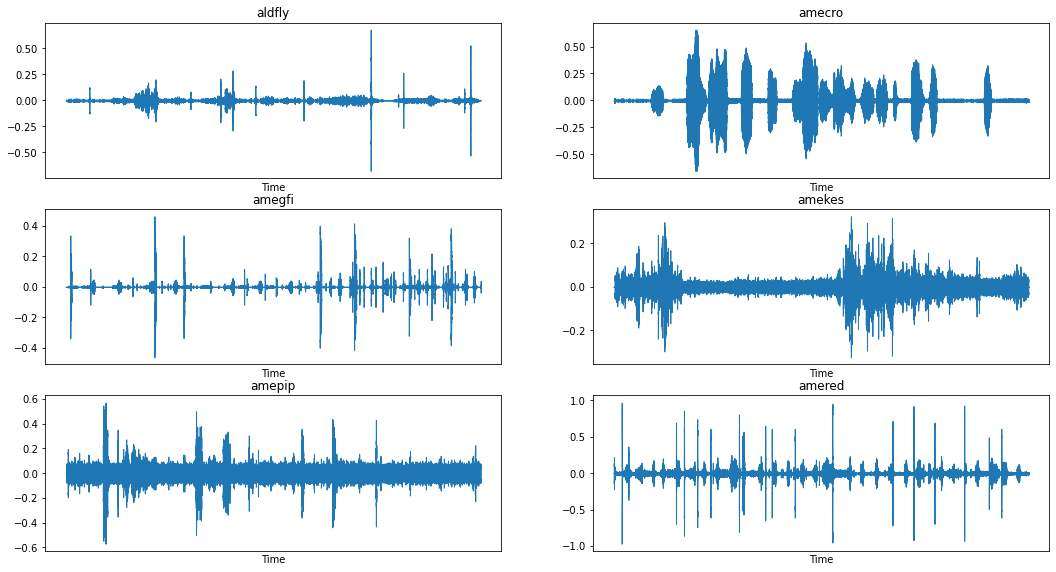

In [12]:
# Create the path needed for all audio files
path = "C:\\Users\\allis\\Bird Recognition Project\\all_audio"
# Obtain unique bird species names by ebird_code
species = model_data.ebird_code.unique()

# Height and width of figure
plt.figure(figsize=(18,20))
# Shows waveform of the first sound file of the first 6 species
for i in range(0,6):
    # Grabs the first audio file name of each unique species from the filename_wav colum
    audio_file = model_data[model_data.ebird_code == species[i]]['filename_wav'].values[0]
    # Joins path with unique species ebird_code and audio_file
    audio_path = os.path.join(path, species[i], audio_file)
    # Position of image
    plt.subplot(6, 2, i+1)
    # Loads audio and sample rate with librosa from audio_path
    audio, sr = librosa.load(audio_path)
    # Displays the waveform
    librosa.display.waveshow(audio, x_axis = 'time')
    # Name of the species shown
    plt.title(species[i])
    # Making the ticks on the x-axis blank
    plt.gca().axes.get_xaxis().set_ticks([])

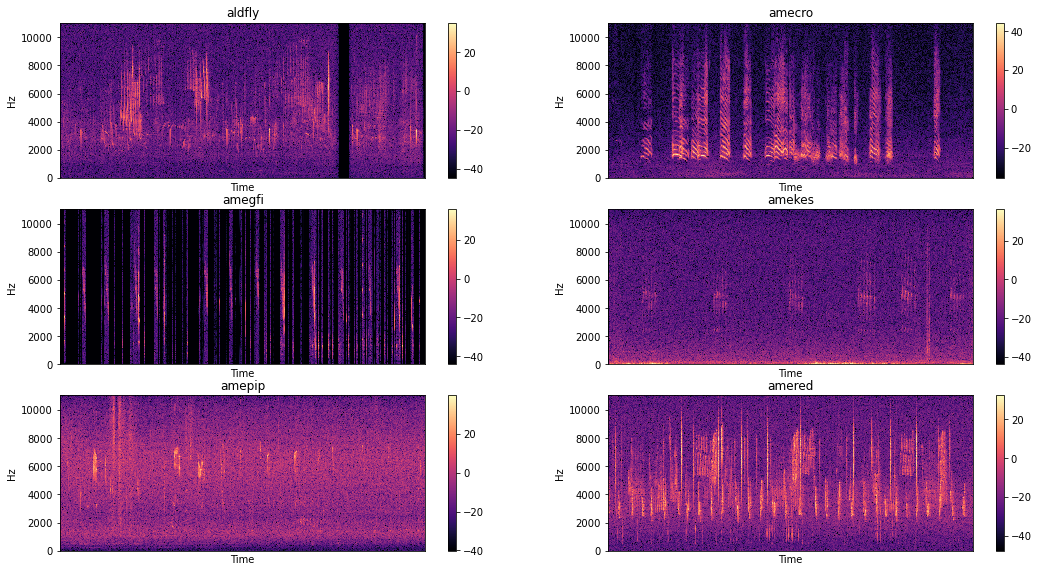

In [13]:
# Create the path needed for all audio files
path = "C:\\Users\\allis\\Bird Recognition Project\\all_audio"
# Obtain unique bird species names by ebird_code
species = model_data.ebird_code.unique()

# height and width of figure
plt.figure(figsize = (18,20))
# Shows spectrogram of the first sound file of the first 6 species
for i in range(0,6):
    # Grabs the first audio file name of each unique species from the filename_wav colum
    audio_file = model_data[model_data.ebird_code == species[i]]['filename_wav'].values[0]
    # Joins path with unique species ebird_code and audio_file
    audio_path = os.path.join(path, species[i], audio_file)
    # Position of image
    plt.subplot(6, 2, i+1)
    # Loads audio and sample rate with librosa from audio_path
    audio, sr = librosa.load(audio_path)
    # Computes Fourier transformation of audio
    audio = librosa.stft(audio)
    # Converts amplitude to decibels, becomes logarithmic instead of linear
    audio_db = librosa.amplitude_to_db(abs(audio))
    # Displays the spectrogram
    librosa.display.specshow(audio_db, x_axis = 'time', y_axis = 'hz', cmap = 'magma')
    # Name of the species shown
    plt.title(species[i])
    # Making the ticks on the x-axis blank
    plt.gca().axes.get_xaxis().set_ticks([])
    # Shows the colorbar on the side in decibels
    plt.colorbar()